In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

In [29]:
#to use functions from scripts in the image processing folder
import sys
from pathlib import Path
sys.path.insert(0, str(Path(sys.path[0]).parent.absolute())+"/EDA")
from EDA_functions import *
from image_processing import load_MRI_gifs, extract_box, stacked_boxes


In [30]:
df = pd.read_csv('../data/oasis_cross-sectional.csv')
df['CDR'].fillna(0, inplace=True)

In [31]:
#defining regions to be extracted from the images
# x_min, x_max, y_min, y_max
tra_box = [45, 130, 50, 130]
sag_box = [0, 75, 20, 80]
cor_box = [50, 130, 110, 145]
all_box = [tra_box, sag_box, cor_box]

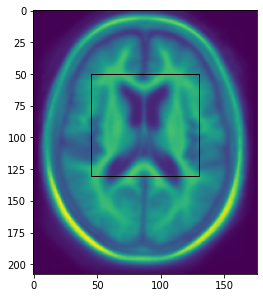

In [32]:
#plotting box in traverse image
img_mean(load_MRI_gifs(demented(df)["ID"], "traverse"), box=tra_box)

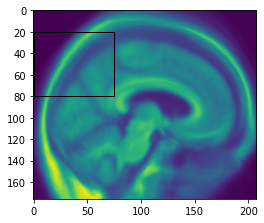

In [33]:
#plotting box in saggital image
img_mean(load_MRI_gifs(demented(df)["ID"], "sagittal"), box=sag_box)

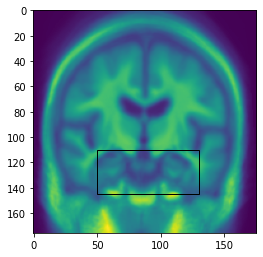

In [34]:
#plotting box in cortical image
img_mean(load_MRI_gifs(demented(df)["ID"], "cortical"), box=cor_box)

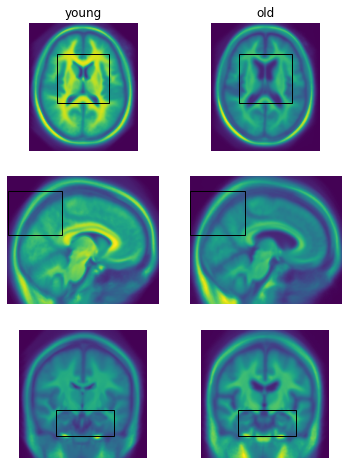

In [35]:
#plotting boxes in all planes
compare_two_means(
    load_MRI_gifs(young(df)["ID"], "all"), 
    load_MRI_gifs(old(df)["ID"], "all"), 
    "young", "old", all=True, box=all_box)

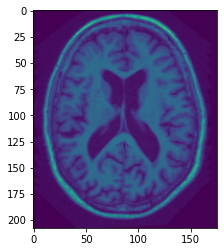

In [36]:
# extracting region from single image
tra_90 = load_MRI_gifs(plane="traverse", IDs=df["ID"])
plt.imshow(tra_90[0], vmax=255)

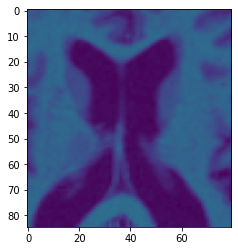

In [37]:
#show extracted region
plt.imshow(extract_box(tra_90[0], box=tra_box), vmax=255)

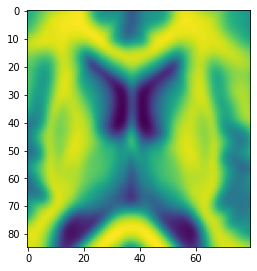

In [38]:
#extract same region from all images in the stack
tra_extracts = stacked_boxes(tra_90, tra_box)
#plot mean of extracts
img_mean(tra_extracts)